<a href="https://colab.research.google.com/github/httran1/Data_Science_HT/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION

The notebook uses the pollution data on ridge regression from OpenML

https://www.openml.org/search?type=data&sort=runs&id=542&status=active

Importing packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Get the data from open source

In [ ]:
from sklearn.datasets import fetch_openml
#Get the data
data1 = fetch_openml(name = 'pollution', as_frame = True, version=1)

#Create data frame
df = pd.DataFrame(data1['data'], columns=data1['feature_names'])

#Add target data to data frame
df['target'] = data1['target']

#Observe the first few rows
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO2,HUMID,target
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.875
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


The null hypothesis is HC increase when NOX increase

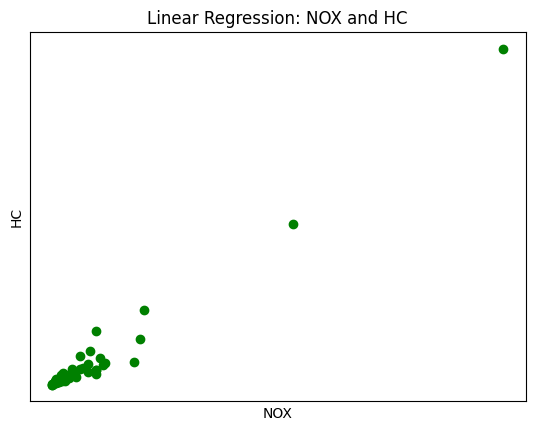

In [ ]:
#Plot
x = df['NOX'] #Independent variable
y = df['HC'] #Dependent variable or response

#Ploting x and y variables
plt.scatter(x, y, color = 'green', )
plt.xticks(())
plt.yticks(())
plt.title('Linear Regression: NOX and HC')
plt.xlabel('NOX')
plt.ylabel('HC')
plt.show()

Fitting the model and results

In [ ]:
#Classical statistical approach
import statsmodels.api as sm

#Add constant (y-intercept) this is optional
x_constant = sm.add_constant(x)

#Defining model using Ordinary Least Square Regression
model = sm.OLS(y, x_constant)

#Fitting model
results = model.fit()

#Resutlt
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HC   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1751.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           4.99e-45
Time:                        21:04:54   Log-Likelihood:                -252.72
No. Observations:                  60   AIC:                             509.4
Df Residuals:                      58   BIC:                             513.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3866      2.391     -2.671      0.0

R squared is 0.968 so our model is very accurate

In [ ]:
x_constant #data frame start at index 0

,const,NOX
0,1.0,15
1,1.0,10
2,1.0,6
3,1.0,8
4,1.0,38
5,1.0,32
6,1.0,32
7,1.0,4
8,1.0,12
9,1.0,7


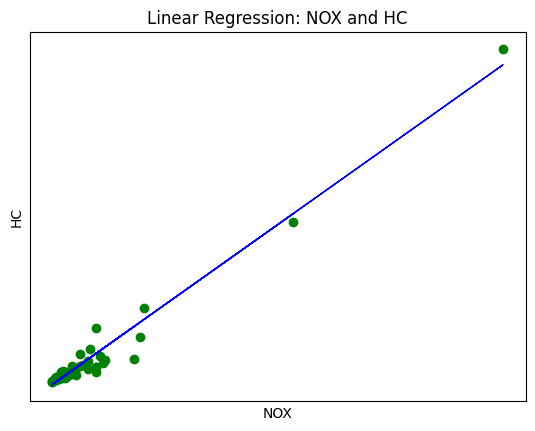

In [ ]:
#Plot the linear model with the raw data
plt.scatter(x, y, color = 'green')
plt.plot(x, results.fittedvalues, color = 'blue', linewidth = 1) #results.fittedvalues is y
plt.title('Linear Regression: NOX and HC')
plt.xlabel('NOX')
plt.ylabel('HC')
plt.xticks(())
plt.yticks(())
plt.show()

Utilize another package - Machine learning approach from scikit-learn


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Test and train splitting

Model the data on training set

Test how accurate the data on test set


In [ ]:
#Split data into training/testing sets - Split them 50/50
x_train = x_constant[:-30]
x_test = x_constant[-30:]


#Split the target into training/testing sets
y_train = y[:-30]
y_test = y[-30:]


Fitting the model

In [ ]:
#Linear regression object
regression_model = linear_model.LinearRegression()

#Train the model using the training set
regression_model.fit(x_train, y_train)

#Make prediction using the test set
y_pred = regression_model.predict(x_test)


Model performance calculations

In [ ]:
#Coefficients
print('Coefficients: \n', regression_model.coef_)

#The mean squared error
print('Mean squared error: %0.2f' % mean_squared_error(y_test, y_pred))

#The coefficient of determination wtih 1 is perfect prediction
print('Coefficient of determination: %0.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.         2.00318992]
Mean squared error: 343.75
Coefficient of determination: 0.90


On average, for one unit increase in NOX, we expect an 2 times increase in HC value. Coefficient of determination is 0.90 meaning the linear relationship betwen NOX and HC explain 90% of variability in HC. Our model is relatively good to predict HC change with NOX as a predictor.

Plotting the result

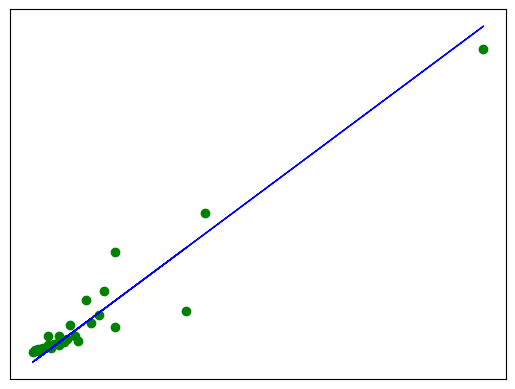

In [ ]:
#Plot outputs
#Scatterplot on the test set
plt.scatter(x_test['NOX'], y_test, color = 'green')
#Line plot of predicted value also on test set
plt.plot(x_test['NOX'], y_pred, color = 'blue', linewidth = 1)

plt.xticks(())
plt.yticks(())
plt.show()